In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [48]:
import matplotlib.dates as mdates



In [3]:
# importing washington post database
df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv")

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7802 entries, 0 to 7801
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7802 non-null   int64  
 1   name                     7377 non-null   object 
 2   date                     7802 non-null   object 
 3   manner_of_death          7802 non-null   object 
 4   armed                    7593 non-null   object 
 5   age                      7316 non-null   float64
 6   gender                   7781 non-null   object 
 7   race                     6293 non-null   object 
 8   city                     7802 non-null   object 
 9   state                    7802 non-null   object 
 10  signs_of_mental_illness  7802 non-null   bool   
 11  threat_level             7802 non-null   object 
 12  flee                     6903 non-null   object 
 13  body_camera              7802 non-null   bool   
 14  longitude               

In [9]:
udf = df[df.armed=="unarmed"]

In [31]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 2 to 7775
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       458 non-null    int64         
 1   name                     454 non-null    object        
 2   date                     458 non-null    datetime64[ns]
 3   manner_of_death          458 non-null    object        
 4   armed                    458 non-null    object        
 5   age                      452 non-null    float64       
 6   gender                   458 non-null    object        
 7   race                     428 non-null    object        
 8   city                     458 non-null    object        
 9   state                    458 non-null    object        
 10  signs_of_mental_illness  458 non-null    bool          
 11  threat_level             458 non-null    object        
 12  flee                     426 non-nu

In [30]:
# udf["date"] = udf["date"].astype("datetime64")
udf["date"] = pd.to_datetime(udf["date"]).dt.to_pydatetime()


/var/folders/xf/hvmt2df550v3bwqbms0tskbm0000gn/T/ipykernel_29231/650298133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  udf["date"] = pd.to_datetime(udf["date"]).dt.to_pydatetime()


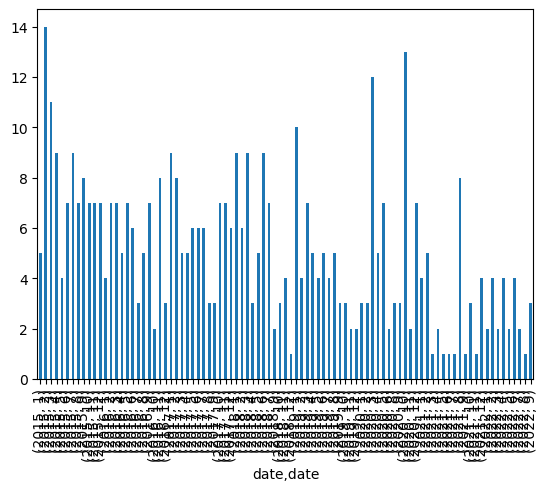

In [47]:
# udf.plot("date")
# udf.groupby(udf["date"].dt.month).size().plot(kind="bar")
bydate = udf.groupby([udf["date"].dt.year, udf["date"].dt.month]).size()
udf.groupby([udf["date"].dt.year, udf["date"].dt.month]).size().plot(kind="bar");


In [45]:
bydate.head()

date  date
2015  1        5
      2       14
      3       11
      4        9
      5        4
dtype: int64

In [49]:
# plt.plot_date(bydate.index,bydate)


In [ ]:
#trying printing using matplotlib's date stuff
mpl_data = mdates.epoch2num(data)


fig, ax = plt.subplots(1,1)
ax.hist(mpl_data, bins=50, color='lightblue')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%y'))
plt.show()
